Artificial Neural Network

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
#Libraries importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


To Find whether a customer is going to quite the bank or any organization

In [6]:
#Independent and Dependent Features
X = data.iloc[:,3:13] #Indenpendent feature
Y = data.iloc[:,13] #Dependent Feature

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
#Change Categorical to Numerical
#Feature Engineering
Geo = pd.get_dummies(X['Geography'],drop_first=True)
#We drop the first as the absence of the two other features represents the presence of the first one

In [10]:
Gender = pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
#Concatenate variables with the dataframe
#First drop the two columns in the table
X=X.drop(['Geography','Gender'], axis = 1,)
#Drop only column not row(axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
#Concatination
X=pd.concat([X,Geo,Gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [14]:
#Splitting the Dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0
                                                 )

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

ANN does not require feature engineering as it can also be solved with machine learning part.

Similarly Why we use fit_transform for X_train and transform for X_test is due to data leakage(To avoid data leakage)

In [19]:
#Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [20]:
#Initialize ANN
classifier = Sequential()

In [21]:
#Add input layer
classifier.add(Dense(units=11,activation='relu'))

In [42]:
#Add First Hidden Layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2)) #Dropout layer added to prevent overfitting

In [43]:
#Add Second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [44]:
#Output Layer
classifier.add(Dense(units=1,activation='sigmoid')) #Sigmoid for binary classification

By default adam uses a learning rate of 0.5. If we want we can specify it

In [45]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [47]:
#Train ANN
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Validation_split is the percentage of data used for validation in each epoch to find the accuracy.

In [48]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7985 - loss: 0.4998 - val_accuracy: 0.8383 - val_loss: 0.4064
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8109 - loss: 0.4314 - val_accuracy: 0.7955 - val_loss: 0.4066
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8240 - loss: 0.4218 - val_accuracy: 0.7955 - val_loss: 0.4029
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8138 - loss: 0.4296 - val_accuracy: 0.8406 - val_loss: 0.4105
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8236 - loss: 0.4269 - val_accuracy: 0.8326 - val_loss: 0.4097
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8250 - loss: 0.4192 - val_accuracy: 0.8425 - val_loss: 0.4030
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8141 - loss: 0.4222 - val_accuracy: 0.7955 - val_loss: 0.4199
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8154 - loss: 0.4260 - val_accu

In [50]:
classifier.save('FirstModel.h5')

Stop when there is no change in accuracy

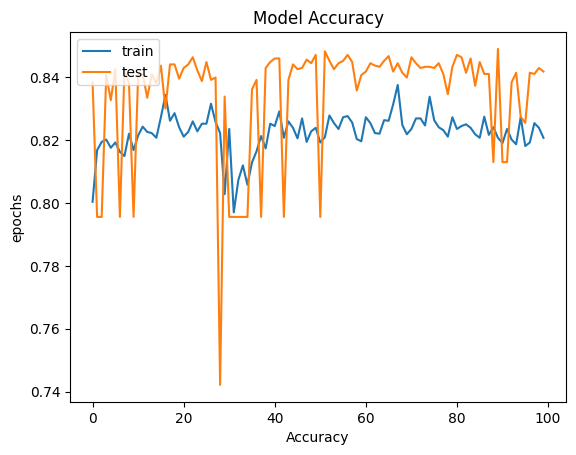

In [51]:
model_history.history.keys()
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [52]:
#Early Stopping-stops training when the monitored metric does not improve
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,#See all details
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [53]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8256 - loss: 0.4451 - val_accuracy: 0.8432 - val_loss: 0.3991
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8331 - loss: 0.4285 - val_accuracy: 0.8417 - val_loss: 0.4045
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8202 - loss: 0.4455 - val_accuracy: 0.8425 - val_loss: 0.4075
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8274 - loss: 0.4329 - val_accuracy: 0.8258 - val_loss: 0.4190
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8203 - loss: 0.4424 - val_accuracy: 0.8417 - val_loss: 0.4105
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8398 - loss: 0.4292 - val_accuracy: 0.8413 - val_loss: 0.4032
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8213 - loss: 0.4580 - val_accuracy: 0.8417 - val_loss: 0.4065
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8383 - loss: 0.4298 - 

In [55]:
classifier.save('FirstModel1.h5')

In [56]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

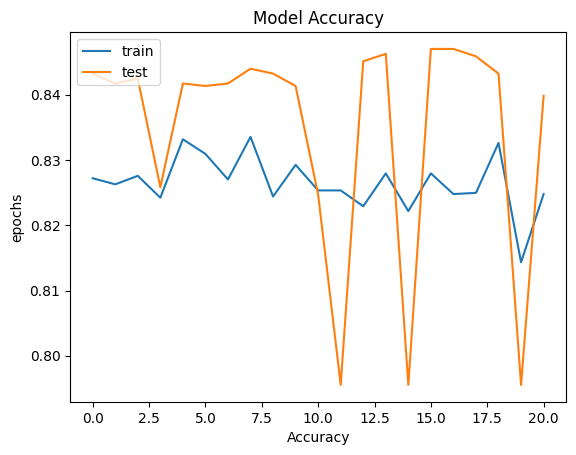

In [57]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

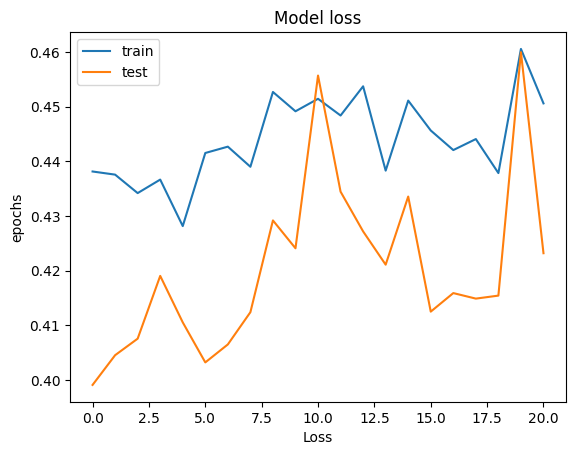

In [58]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Loss')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [60]:
#Prediction
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
##Make a confusion matrix
from sklearn.metrics import confusion_matrix
Conf_matrix = confusion_matrix(Y_test,Y_pred)
Conf_matrix

array([[1576,   19],
       [ 270,  135]])

In [62]:
##Calculate accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_pred,Y_test)
acc_score

0.8555

In [63]:
#Get the weights and store the weights as pickle file
classifier.get_weights()

[array([[ 3.1165731e+00, -4.8535079e-01,  3.4726116e-01,  1.6526043e+00,
          2.4093130e+00,  1.6031179e+00,  1.4382091e+00, -9.8095977e-01,
         -5.9858948e-01, -1.4773066e+00, -1.6279347e+00],
        [-3.1119041e+00, -7.0548530e+00,  5.9216986e+00, -4.9312015e+00,
          1.5121597e+00, -2.3819664e+00,  3.9727700e-01,  8.6086136e-01,
          3.3700771e+00,  2.7683089e+00,  7.4642873e+00],
        [ 2.9632804e+00,  2.3231031e-01,  8.3390522e-01, -2.5123665e+00,
         -2.5940003e-02,  1.7501686e+00, -6.9148558e-01, -3.0853137e-01,
         -1.5804987e+00, -9.1117173e-02, -7.1761012e-01],
        [-7.5727031e-02,  1.4776877e-01, -1.3726284e-01,  8.7516016e-01,
         -2.6503670e+00, -3.6843193e+00,  4.3126497e+00,  1.4971355e+00,
         -1.2322330e+00,  9.2628729e-01, -3.3166246e+00],
        [ 3.4244375e+00,  2.4221163e+00,  5.2783718e+00,  1.1500394e+00,
         -1.1132571e+00, -1.5711792e-01,  7.5452097e-02,  7.5730944e+00,
          3.5791746e-01, -3.7987927e-0